<h1 style="color: blue;">나-1. 딥러닝 평가 지표 - 회귀모델</h1>

<h2 style="color: green;">평균절대오차</h2>

실제 정답값과 예측값의 차이를 절댓값으로 변환한 뒤 합산하여 평균을 구한다. 특이값이 많은 경우에 주로 사용된다. 값이 낮을수록 좋다.

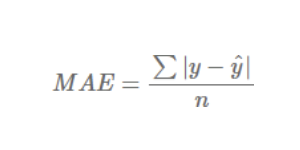

**장점**
+ 직관적임 
+ 정답 및 예측값과 같은 단위를 가짐

**단점**
+ 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
+ 스케일 의존적임(scal dependency): 모델마다 에러율 크기가 동일해도 에러율은 동일하지 않음

### *평균절대오차 실습*

In [5]:
import torch

In [6]:
#예측값과 실제값을 입력받아서 MAE 계산하는 함수
def calculate_mae(pred, target) :
    mae = torch.mean(torch.abs(pred - target))
    #torch.abs는 주어진 텐서의 각 요소에 대해 절댓값을 계산하는 함수
    
    return mae

#예시 데이터
pred = torch.tensor([3.1, 4.2, 2.8, 5.3])
targets = torch.tensor([3.0, 4.0, 3.2, 4.5])

#mae 계산
mae = calculate_mae(pred, targets)
print(f"MAE : {mae.item()}")

MAE : 0.375


<h2 style="color: green;">평균절대오차</h2>

실제 정답값과 예측값의 차이를 제곱한 뒤 평균을 구한다. 값이 낮을수록 좋다.

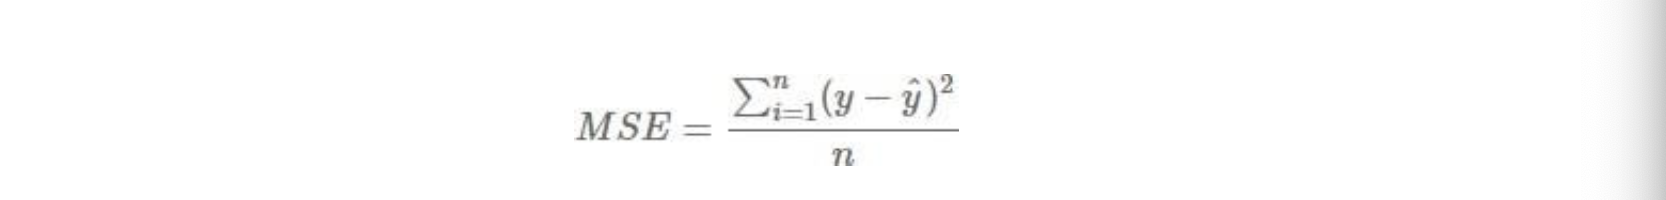

**장점**
+ 직관적임

**단점**
+ 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
+ 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
+ 스케일 의존적임(scal dependency) : 모델마다 에러율 크기가 동일해도 에러율은 동일하지 않음


### *평균 제곱 오차 실습*

In [7]:
def calculate_mse(pred, target) :
    mse = torch.mean((pred - target) ** 2)
    
    return mse

#예시 데이터
pred = torch.tensor([3.1, 4.2, 2.8, 5.3])
targets = torch.tensor([3.0, 4.0, 3.2, 4.5])

#mse 계산
mse = calculate_mse(pred, targets)
print(f"MSE : {mse.item()}")

MSE : 0.21250006556510925


<h2 style="color: green;">평균 제곱근 오차</h2>

MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다. 값이 낮을수록 좋다.

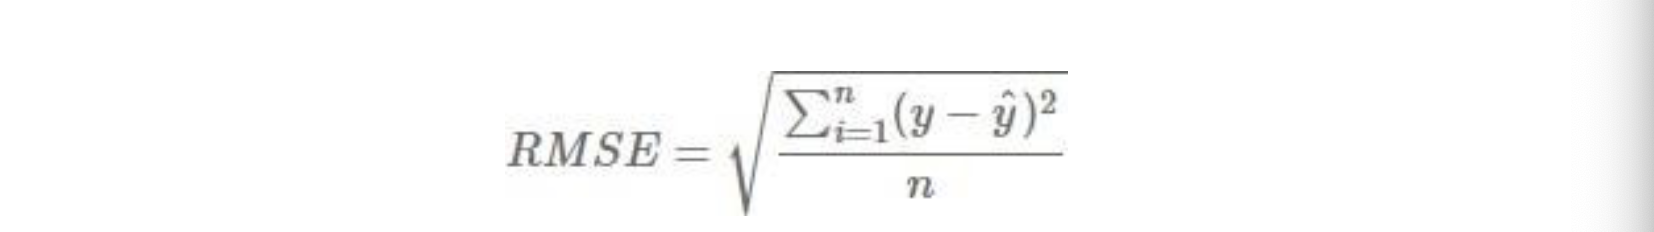

**장점**
+ 직관적임

**단점**
+ 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
+ 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
+ 스케일 의존적임(scal dependency) : 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음

### *평균 제곱근 오차 실습*

In [8]:
import math

def calculate_rmse(pred, target) :
    mse = torch.mean((pred - target) ** 2)
    rmse = math.sqrt(mse)
    
    return rmse

#예시 데이터
pred = torch.tensor([3.1, 4.2, 2.8, 5.3])
targets = torch.tensor([3.0, 4.0, 3.2, 4.5])

#mse 계산
rmse = calculate_rmse(pred, targets)
print(f"RMSE : {rmse}")

RMSE : 0.4609772939799847


<h2 style="color: green;">평균 절대 비율 오차</h2>

MAE를 비율, 퍼센트로 표현하여 스케일 의존적 에러의 문제점을 개선한다 값이 낮을수록 좋다.

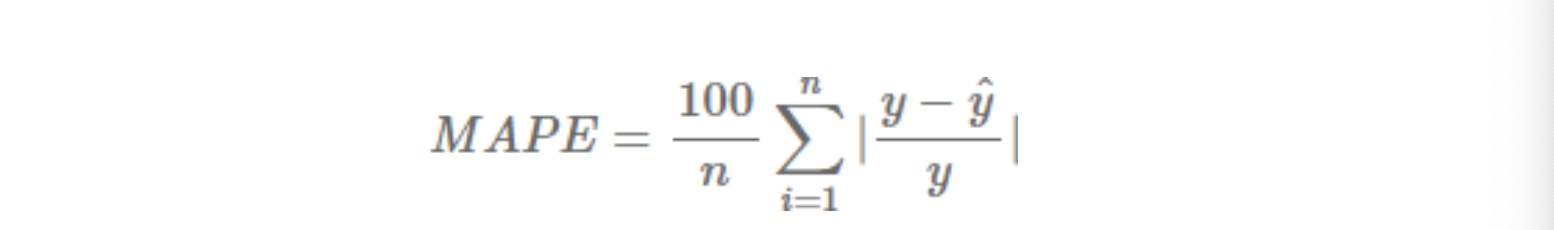

**장점**
+ 직관적임
+ 다른 모델과 에러율 비교가 쉬움

**단점**
+ 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
+ 실제 정답이 1보다작을 경우,무한대의 값으로 수렴할 수 있음

### *평균 절대 비율 오차 실습*

In [9]:
def calculate_mape(pred, target) :
    abs_errors = torch.abs(pred - target)
    relative_errors = abs_errors / target
    mape = torch.mean(relative_errors) * 100
    
    return mape

#예시 데이터
pred = torch.tensor([10.2, 15.4, 7.8, 9.1])
targets = torch.tensor([12.0, 11.5, 8.1, 8.9])

mape = calculate_mape(pred, targets)
print(f"MAPE : {mape.item()}")

MAPE : 13.715988159179688


<h1 style="color: blue;">나-2. 딥러닝 평가 지표 - 분류모델</h1>

<h2 style="color: green;">Confusion Matrix(혼동 행렬, 오차 행렬)</h2>

분류 모델(classifier)의 성능을 측정할 때 자주 사용되는 표로 모델이 두 개의 클래스를
얼마나 헷갈려하는지 알 수 있다.

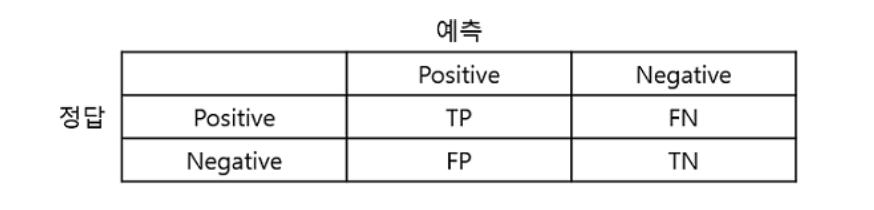

+ TP(True Positive): 모델이 positive라고 예측했는데 실제로 정답이 positive (정답)
+ TN(True Negative): 모델이 negative라고 예측했는데 실제로 정답이 negative (정답) 
+ FP(False Positive): 모델이 positive라고 예측했는데 실제로 정답이 negative (오답) 
+ FN(False Negative): 모델이 negative라고 예측했는데 실제로 정답이 positive (오답)

### *혼동 행렬 오차 행렬 실습*

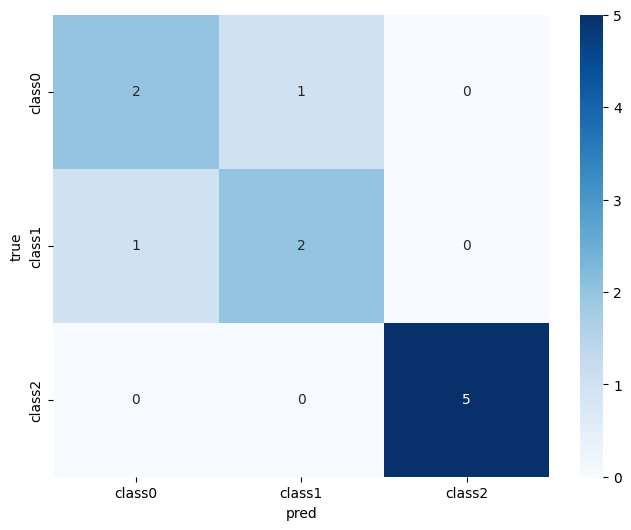

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#실제 레이블
true_labels = [0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2]

#예측 레이블
pred_labels = [0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2]

class_labels = ['class0', 'class1', 'class2']

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

"""
cm은 혼동 행렬을 나타내며, annot=True는 각 셀에 값을 표시하도록 설정하고, 
fmt='d'는 셀의 값 형식을 정수로 지정합니다. cmap='Blues'는 색상 맵을 지정하여 열지도의 색상을 설정합니다. 
xticklabels와 yticklabels는 x축과 y축의 레이블을 설정하는데, 여기서는 class_labels의 값을 사용합니다.
"""

plt.xlabel('pred')
plt.ylabel('true')
plt.show()

<h2 style="color: green;">Accuracy(정확도)</h2>

모델이 전체 문제 중에서 정답을 맞춘 비율이다.

하지만 데이터가 불균형할 때(ex) positive:negative=9:1)는 Accuracy만으로 제대로 분류했는지는 알 수 없기 때문에 Recall과 Precision을 사용한다.

0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.

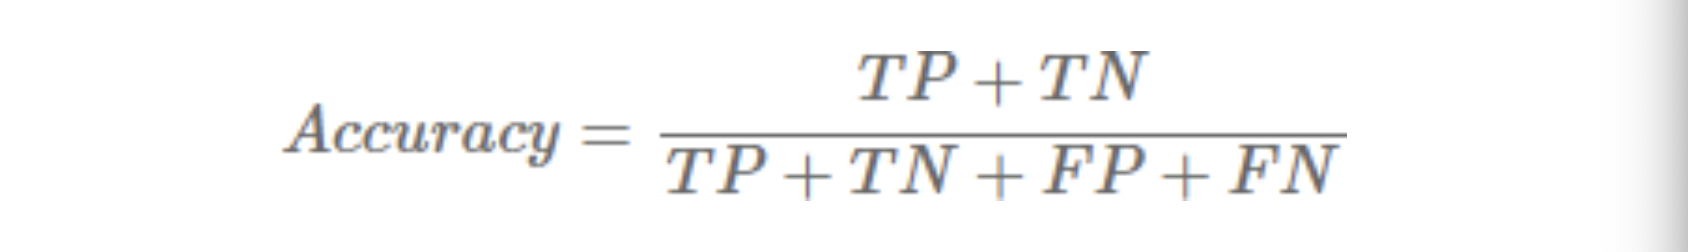

<h2 style="color: green;">Precision 정밀도</h2>

모델이 positive라고 예측한 것들 중에서 실제로 정답이 positive인 비율이다.

실제 정답이 negative인 데이터를 positive라고 잘못 예측하면 안 되는 경우에 중요한 지표가 될 수 있다. Precision을 높이기 위해선 FP(모델이 positive라고 예측했는데 정답은 negative인 경우)를 낮추는 것이 중요하다.

0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.

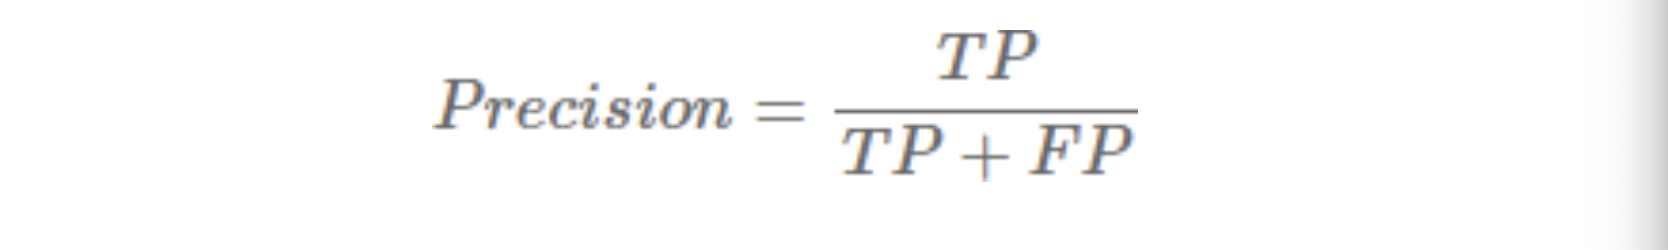

### *Precision 정밀도 실습*

In [14]:
from sklearn.metrics import precision_score

In [15]:
#데이터
actual_labels = [1,0,0,1,1,0,1,1,0,0,1]
pred_labels = [1,1,0,1,1,1,1,1,0,1,1]

#정밀도 계산
precision = precision_score(actual_labels, pred_labels)

print("precision :", precision)

precision : 0.6666666666666666


<h2 style="color: green;">Recall(재현율) = Sensitivity(민감도) = TPR</h2>

실제로 정답이 positive인 것들 중에서 모델이 positive라고 예측한 비율이다.

실제 정답이 positive인 데이터를 negative라고 잘못 예측하면 안 되는 경우에 중요한 지표가 될 수 있다. Recall를 높이기 위해선 FN(모델이 negative라고 예측했는데 정답이 positive인 경우)을 낮추는 것이 중요하다.

0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.

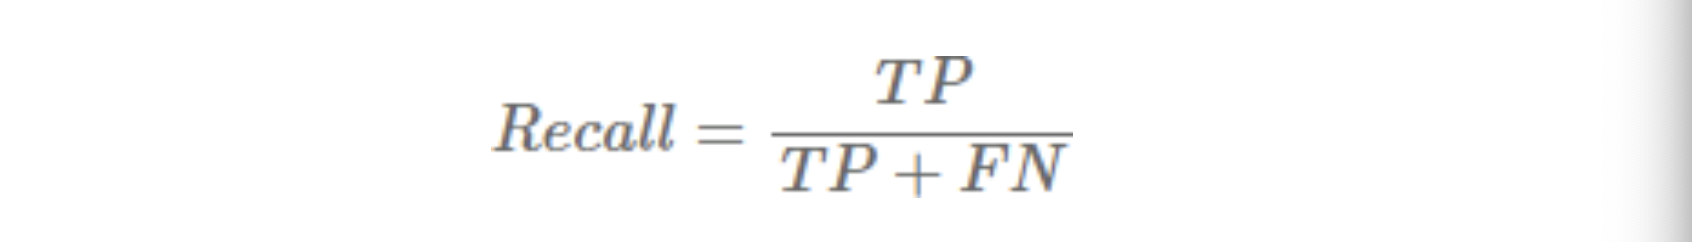

### *Recall = Sensitivity = TPR 실습*

In [16]:
from sklearn.metrics import recall_score

In [17]:
actual_labels = [1,0,0,1,1,0,1,1,0,0,1]
pred_labels = [1,1,1,1,1,0,0,0,0,0,1]

recall = recall_score(actual_labels, pred_labels)
print("recall :",recall)

recall : 0.6666666666666666


<h2 style="color: green;">F1 score</h2>

Recall과 Precision의 조화평균이다.

Recall과 Precision은 상호 보완적인 평가 지표이기 때문에 F1 score를 사용한다.

Precision과 Recall이 한쪽으로 치우쳐지지 않고 모두 클 때 큰 값을 가진다. 0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.

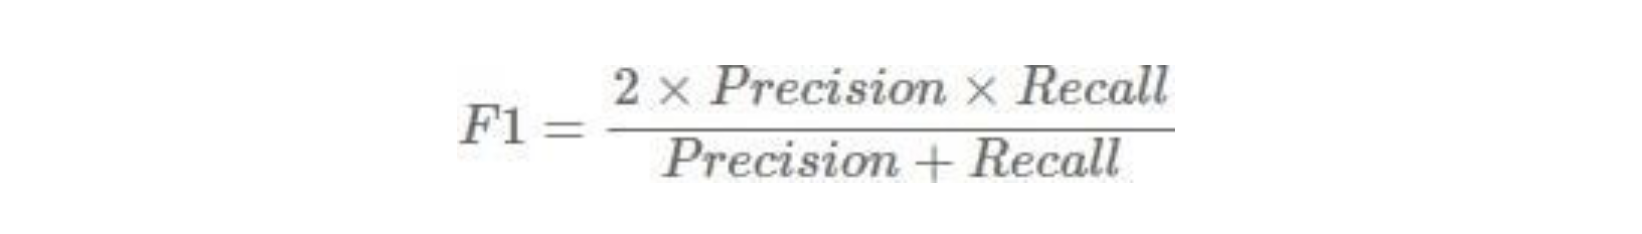

### *F1 score 실습*

In [44]:
from sklearn.metrics import f1_score

In [46]:
actual_labels = [1,0,0,1,1,0,1,1,0,0,1]
pred_labels = [1,0,1,1,1,0,0,0,0,0,1]

f1 = f1_score(actual_labels, pred_labels)
print("f1 score :",f1)

f1 score : 0.7272727272727272


<h1 style="color: blue;">나-3. 딥러닝 평가 지표 - 객체 인식 모델</h1>

<h2 style="color: green;">IOU</h2>

객체 검출의 정확도를 평가하는 지표.

일반적으로 Object Detection에서 개별 객체에 대한 검출이 성공하였는지를 결정하는 지표로 0~1 사이의 값을 가진다.

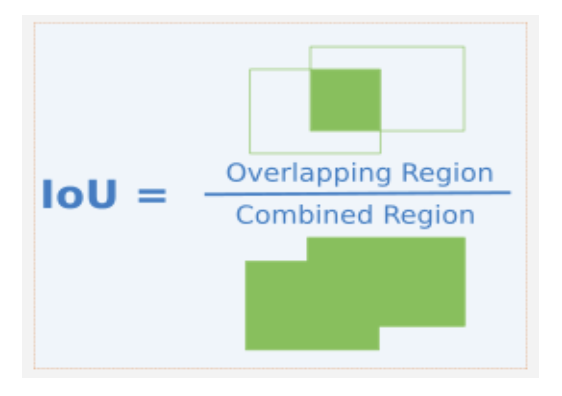

### *IOU 실습*

In [21]:
def calculate_iou(bbox1, bbox2) :
    
    """
    bbox1 [x1, y1, x2, y2]
    bbox2 [x1, y1, x2, y2]
    """
    
    #각 영역의 좌표 추출
    x1_1, y1_1, x2_1, y2_1 = bbox1
    x1_2, y1_2, x2_2, y2_2 = bbox2
    
    x_left = max(x1_1, x1_2)
    y_top = max(y1_1, y1_2)
    x_right = min(x2_1, x2_2)
    y_bottom = min(y2_1, y2_2)
    
    #교차 영역의 넓이 계산
    area = max(0, x_right - x_left + 1) * max(0, y_bottom - y_top + 1)
    
    #각 영역의 넓이를 계산
    bbox1_area = (x2_1 - x1_1 + 1) * (y2_1 - y1_1 + 1)
    bbox2_area = (x2_2 - x2_1 + 1) * (y2_2 - y2_1 + 1)
    #max(0, ...)로 감싸주는 것은 범위의 길이가 음수일 경우에는 0으로 처리하기 위함
    
    #IOU 계산하기
    iou = area / (bbox1_area + bbox2_area - area)
    
    return iou   

In [22]:
bbox1 = [100, 100, 300, 300]
bbox2 = [150, 150, 400, 400]

iou = calculate_iou(bbox1, bbox2)

print("IOU >> ", iou)

IOU >>  0.820150354303802


<h2 style="color: green;">Dice Coefficient</h2>

예측된 분할 영역과 실제 분학 영역 사이의 공통 영역의 크기를 합집합 영역의 크기로 나눈 값을 계산합니다. Dice계수는 분할 영역의 정확성을 측정하는데 유용하며, IoU와 비슷한 개념입니다.

### *Dice Coefficient 실습*

두 개의 세그멘테이션(분할) 결과를 비교하여 유사성을 측정

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def dice_coefficient(pred_mask, true_mask) :
    intersection = np.logical_and(pred_mask, true_mask)
    dice = (2.0 * intersection.sum()) / (pred_mask.sum() + true_mask.sum())
    #Dice 계수는 교차 부분의 크기를 분자에 두 번 포함해야 하기 때문에 intersection.sum()에 2를 곱해주는 것입니다.
    
    return dice

In [39]:
#시각화
def plot_masks(pred_mask, true_mask) :
    plt.subplot(1,2,1)
    plt.imshow(pred_mask, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.imshow(true_mask, cmap='gray')
    plt.show()

In [40]:
#데이터 생성
pred_mask = np.array([[0,1,1,0],
                     [1,1,0,0],
                     [0,1,1,1]
                     ])

true_mask = np.array(([1,1,0,0],
                      [1,0,0,0],
                      [0,1,1,1]))

Dice Cofficient :  0.7692307692307693


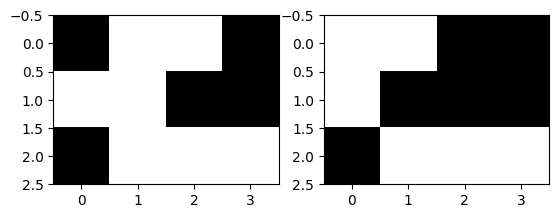

In [41]:
#계산 진행
dice = dice_coefficient(pred_mask, true_mask)

print("Dice Cofficient : ", dice)

#시각화
plot_masks(pred_mask, true_mask)